In [1]:
import cv2

<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>

### Detect Face

In [2]:
def detect_face(frame):
    detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    faces = detector.detectMultiScale(frame, 1.2)
    return faces

### Gray Images

In [3]:
def gray_scale(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

### Cut Face

In [4]:
# [(10,20, 100,200),(200,20, 100,200)]
def cut_face(image, face_coord):
    faces = []
    for (x,y,w,h) in face_coord:
        face = image[y:y+h, x:x+w]
        faces.append(face)
    return faces

### Normalize face by increasing pixel intensity (brightness)

In [5]:
def normalize_intensity(images):
    edited_images = [cv2.equalizeHist(img) for img in images]
#     for img in images:
#         edited_images.append(cv2.equalizeHist(img))
    return edited_images

### Resize Image

In [6]:
def resize(images, size=(200,200)):
    resized_images = []
    for img in images:
        img = cv2.resize(img, size)
        resized_images.append(img)
    return resized_images

### Make Pipeline

In [7]:
def normalize_faces(frame, face_coord):
    faces = cut_face(frame, face_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

### Plot Function

In [8]:
def plot_show(image, title=""):
    if len(image.shape)==3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #opencv support bgr but matplotlib supports rgb
    
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, cmap="gray")
    plt.show()

### Draw rectangle on each face

In [9]:
def draw_rectangle(image, coords):
    for (x,y,w,h) in coords:
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)

### OpenCV Window

In [10]:
ord('A')

65

In [11]:
# # cam = cv2.VideoCapture(0) # System camera
# cam = cv2.VideoCapture("dark4.mp4")

# cv2.namedWindow("Test", cv2.WINDOW_NORMAL)

# while True:
#     ret, frame = cam.read()
#     print(ret)
#     cv2.imshow("Test", frame)
    
#     if cv2.waitKey(10) == ord("q"):
#         break

# cam.release()
# cv2.destroyAllWindows()

### Make face dataset

In [12]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

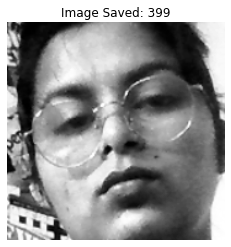

In [13]:
import os
cam = cv2.VideoCapture(0)
name = input("Person Name: ")
no_samples = int(input("Enter No. of samples: "))
if "users" not in os.listdir():
    os.mkdir("users")
folder = "users/"+name.lower()

if os.path.exists(folder):
    print("A person with this name already exists!")
else:
    os.mkdir(folder)
    flag_starts_capturing=False
    sample=1
    
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    
    while True:
        ret, frame = cam.read()
        gray = gray_scale(frame)
        face_coord = detect_face(gray)
        
        if len(face_coord)>0:
            faces = normalize_faces(gray, face_coord)
            img_name = str(sample)+'.jpg'
            cv2.imwrite(folder+'/'+img_name, faces[0])
            plot_show(faces[0], "Image Saved: {}".format(sample))
            clear_output(wait=True)
            
            if flag_starts_capturing==True:
                sample += 1
        else:
            print("No face found!")
        
        draw_rectangle(frame, face_coord)
        cv2.imshow(name, frame)
        cv2.putText(frame, "Press 'm' to start capturing",(0,100),cv2.FONT_HERSHEY_COMPLEX,1, (0,0,255),2,cv2.LINE_AA)
        keypress = cv2.waitKey(1)
        
        if keypress == ord('m'):
            if flag_starts_capturing==False:
                flag_starts_capturing=True
    
        if sample ==no_samples:
            break
        
        if keypress==ord('q'):
            break
    cam.release()
    cv2.destroyAllWindows()

### Build Unknown Person dataset

In [15]:
path = "C:/Users/John/scikit_learn_data/lfw_home/lfw_funneled"
c=1
if "unknown" not in os.listdir("users/"):
    os.mkdir("users/unknown")
for person_name in os.listdir(path)[:400]:
    for img_name in os.listdir(path+'/'+person_name)[:1]:
        img = cv2.imread(path+'/'+person_name+'/'+img_name,0)
        face_coord = detect_face(img)
        if len(face_coord)>0:
            faces = cut_face(img, face_coord)
            faces = normalize_intensity(faces)
            faces = resize(faces)
            img_to_save = 'users/unknown/'+str(c)+'.jpg'
            cv2.imwrite(img_to_save, faces[0])
            print('users/unknown/'+str(c)+'.jpg','saved!')
            c+=1
            

users/unknown/1.jpg saved!
users/unknown/2.jpg saved!
users/unknown/3.jpg saved!
users/unknown/4.jpg saved!
users/unknown/5.jpg saved!
users/unknown/6.jpg saved!
users/unknown/7.jpg saved!
users/unknown/8.jpg saved!
users/unknown/9.jpg saved!
users/unknown/10.jpg saved!
users/unknown/11.jpg saved!
users/unknown/12.jpg saved!
users/unknown/13.jpg saved!
users/unknown/14.jpg saved!
users/unknown/15.jpg saved!
users/unknown/16.jpg saved!
users/unknown/17.jpg saved!
users/unknown/18.jpg saved!
users/unknown/19.jpg saved!
users/unknown/20.jpg saved!
users/unknown/21.jpg saved!
users/unknown/22.jpg saved!
users/unknown/23.jpg saved!
users/unknown/24.jpg saved!
users/unknown/25.jpg saved!
users/unknown/26.jpg saved!
users/unknown/27.jpg saved!
users/unknown/28.jpg saved!
users/unknown/29.jpg saved!
users/unknown/30.jpg saved!
users/unknown/31.jpg saved!
users/unknown/32.jpg saved!
users/unknown/33.jpg saved!
users/unknown/34.jpg saved!
users/unknown/35.jpg saved!
users/unknown/36.jpg saved!
u

users/unknown/289.jpg saved!
users/unknown/290.jpg saved!
users/unknown/291.jpg saved!
users/unknown/292.jpg saved!
users/unknown/293.jpg saved!
users/unknown/294.jpg saved!
users/unknown/295.jpg saved!
users/unknown/296.jpg saved!
users/unknown/297.jpg saved!
users/unknown/298.jpg saved!
users/unknown/299.jpg saved!
users/unknown/300.jpg saved!
users/unknown/301.jpg saved!
users/unknown/302.jpg saved!
users/unknown/303.jpg saved!
users/unknown/304.jpg saved!
users/unknown/305.jpg saved!
users/unknown/306.jpg saved!
users/unknown/307.jpg saved!
users/unknown/308.jpg saved!
users/unknown/309.jpg saved!
users/unknown/310.jpg saved!
users/unknown/311.jpg saved!
users/unknown/312.jpg saved!
users/unknown/313.jpg saved!
users/unknown/314.jpg saved!
users/unknown/315.jpg saved!
users/unknown/316.jpg saved!
users/unknown/317.jpg saved!
users/unknown/318.jpg saved!
users/unknown/319.jpg saved!
users/unknown/320.jpg saved!
users/unknown/321.jpg saved!
users/unknown/322.jpg saved!
users/unknown/